<h1> Example CNN </h1>
<p> First, we'll import the 'ML' module, to use its 'Classifier' class, os, </p>
<p> and TQDM, which is a handy pip-installable package that gives us nice loading bars. </p>

In [1]:
import ML, os
from tqdm import tqdm
import config

<h2> Set your paths! </h2>
<p> 'patient_path' points to our 'condition-positive' dataset; in this example it points to spectral data in the 'ref pain' study folder, using the P300 task data, with 500-sample-long contig windows and all channels </p>
<p> 'reference_path' points to a folder containing healthy control data study folders </p>

In [2]:
patient_path = "/wavi/EEGstudies/CANlab/spectra/P300_250_1111111111111111111_0_1"
reference_path = "/wavi/EEGstudies"

<h3> Instantiate a 'Classifier' Object </h3>
<p> 'Classifier' takes one positional argument, currently either "spectra", "contigs", or "erps" </p>

In [3]:
myclf = ML.Classifier("erps")

<h3> Load Patient (Condition-Positive) Data </h3>

In [4]:
for fname in tqdm(os.listdir(patient_path)):
    if fname[:config.participantNumLen] not in ['1004', '1020']:
        myclf.LoadData(patient_path+"/"+fname)
    else:
        print("Skipped successfully.")

100%|██████████| 870/870 [00:00<00:00, 1098.05it/s]


<h3> Load Control (Condition-Negative) Data </h3>
<p> using the 'Balance' method of 'Classifier', the dataset will automatically add healthy control data found in the reference folders </p> 

In [5]:
myclf.Balance(reference_path)

<h2> Run 'CNN' method of 'Classifier' </h2>
<p> This method will structure the input classes (in this case, 'Spectra' objects) </p>
<p> Optional parameters include:
    <br>- epochs: (int) default 100, number of training iterations to be run
    <br>- normalize: (None, 'standard', 'minmax') default None, z-score normalize input data (features)
    <br>- plot_ROC: (bool) default 'False', plot sensitivity-specificity curve on validation dataset
    <br>- tt_split: (float) default 0.33, ratio of test samples to train samples
    <br>- learning_rate: (float) default 0.01
    <br>- lr_decay: (bool) default False, whether or not the learning rate should decay adhering to a 0.96 decay rate schedule
</p>

Number of negative outcomes: 652
Number of positive outcomes: 630
Total number of subjects: 27
% Positive in all subjects: 0.48148148148148145
% Negative in all subjects: 0.5185185185185185
Number of samples in train: 830
Number of samples in test: 452
% Positive samples in train: 0.4855421686746988
% Positive samples in test: 0.5022123893805309
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  20        
______________________________________

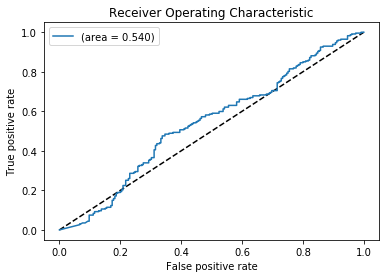

(<tensorflow.python.keras.callbacks.History at 0x7fe3c4353be0>,
 array([0.06937394, 0.8325596 , 0.9044756 , 0.06936698, 0.1821323 ,
        0.7891699 , 0.8687424 , 0.9045129 , 0.9045675 , 0.9039269 ,
        0.9045544 , 0.74608874, 0.06797644, 0.86920124, 0.8981742 ,
        0.904345  , 0.09162636, 0.06932315, 0.1505979 , 0.89821154,
        0.7035417 , 0.904572  , 0.34224862, 0.7546154 , 0.46743357,
        0.1569173 , 0.7700307 , 0.90446955, 0.89549434, 0.90443605,
        0.9045445 , 0.88164026, 0.8247878 , 0.10911296, 0.9043313 ,
        0.29267928, 0.06807236, 0.83049375, 0.68004036, 0.90454173,
        0.9045607 , 0.90456945, 0.6134127 , 0.90441144, 0.45207462,
        0.6210863 , 0.9045714 , 0.89905524, 0.06807405, 0.8752521 ,
        0.9040673 , 0.6129134 , 0.9038549 , 0.90447134, 0.18994313,
        0.06826992, 0.51168853, 0.90420437, 0.8856278 , 0.90455276,
        0.84073895, 0.90455806, 0.90242916, 0.8465371 , 0.9023288 ,
        0.90106606, 0.8091686 , 0.46973148, 0.899165

In [6]:
myclf.CNN(learning_rate=0.01, plot_ROC=True)